# Recurrent Neural Networks for Simple Time Series Data (Synthetic Data) by `Mr. Harshit Dawar`

## Importing the Required Libraries

In [1]:
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

### Generating Data without Noise 

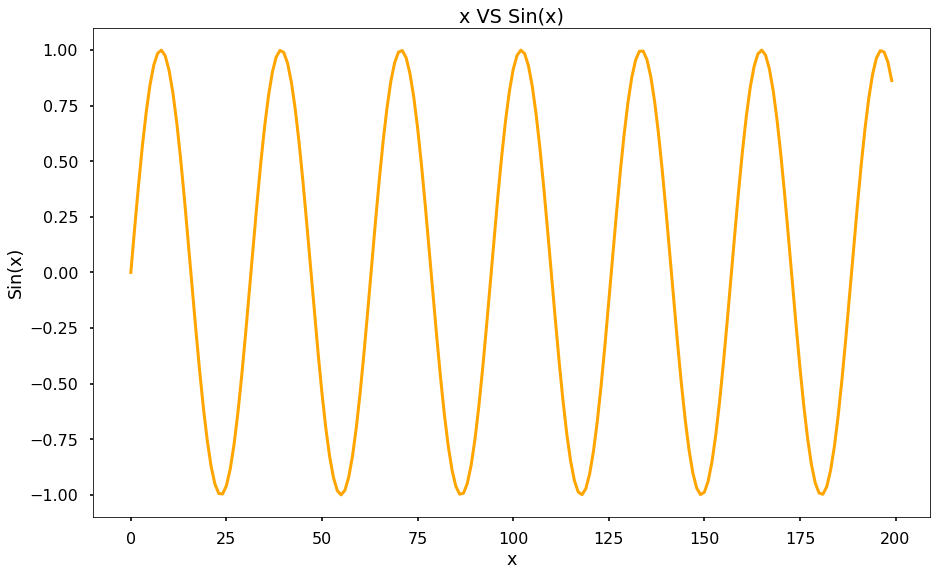

In [2]:
syntheticTimeSeriesData = np.sin(0.2 * np.arange(200))
plt.style.use("seaborn-poster")
plt.figure(figsize = (15, 9))
plt.plot(syntheticTimeSeriesData, c = "orange", linestyle = "solid", linewidth = 3)
plt.title("x VS Sin(x)")
plt.xlabel("x")
plt.ylabel("Sin(x)")
plt.show()

In [3]:
T = 15
Dimension = 1
data = []
forecast = []

for t in range(len(syntheticTimeSeriesData) - T):
    data.append(
        syntheticTimeSeriesData[t : t + T]
    )
    forecast.append(
        syntheticTimeSeriesData[t + T]
    )

data = np.array(data)
forecast = np.array(forecast)

In [4]:
data.shape, forecast.shape

((185, 15), (185,))

In [5]:
data[0]

array([0.        , 0.19866933, 0.38941834, 0.56464247, 0.71735609,
       0.84147098, 0.93203909, 0.98544973, 0.9995736 , 0.97384763,
       0.90929743, 0.8084964 , 0.67546318, 0.51550137, 0.33498815])

In [6]:
forecast[0]

0.1411200080598672

In [7]:
# Changing the shape of the data as required by the RNN (3 Dimensions)
data = data.reshape(-1, T, 1)

In [8]:
data.shape

(185, 15, 1)

### Building a Model with Activation Function

In [9]:
inputShape = Input(shape = (T, Dimension))

# Here by default activation function is Tanh
RNNModel = SimpleRNN(5)(inputShape)
RNNModel = Dense(1)(RNNModel)

model = Model(inputShape, RNNModel)

model.compile(loss = "mse", optimizer = Adam(lr = 0.01))

In [10]:
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15, 1)]           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
limit = data.shape[0] // 2

# Fitting the Model
trainedModel = model.fit(
                            data[ :limit],
                            forecast[ :limit],
                            epochs = 500,
    
                            # Reason for taking the validation set as complete seprate half, because in forecast
                            # validation should always be done on future dataset.
                            validation_data = (data[limit: ], forecast[limit: ])
                           )

Epoch 1/500
3/3 [==============================] - 0s 80ms/step - loss: 0.8426 - val_loss: 0.5387
Epoch 2/500
3/3 [==============================] - 0s 15ms/step - loss: 0.4205 - val_loss: 0.1840
Epoch 3/500
3/3 [==============================] - 0s 24ms/step - loss: 0.1209 - val_loss: 0.0621
Epoch 4/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0950 - val_loss: 0.1361
Epoch 5/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1070 - val_loss: 0.0658
Epoch 6/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0869 - val_loss: 0.0960
Epoch 7/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0841 - val_loss: 0.0539
Epoch 8/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0492 - val_loss: 0.0481
Epoch 9/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0439 - val_loss: 0.0348
Epoch 10/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0291 - val_loss: 0.0296
Epoch 11/500
3/3 [=

3/3 [==============================] - 0s 15ms/step - loss: 3.6034e-04 - val_loss: 3.6018e-04
Epoch 83/500
3/3 [==============================] - 0s 13ms/step - loss: 3.6499e-04 - val_loss: 3.5252e-04
Epoch 84/500
3/3 [==============================] - 0s 11ms/step - loss: 3.4867e-04 - val_loss: 3.5706e-04
Epoch 85/500
3/3 [==============================] - 0s 10ms/step - loss: 3.5025e-04 - val_loss: 3.4255e-04
Epoch 86/500
3/3 [==============================] - 0s 10ms/step - loss: 3.3045e-04 - val_loss: 3.3169e-04
Epoch 87/500
3/3 [==============================] - 0s 22ms/step - loss: 3.3997e-04 - val_loss: 3.3153e-04
Epoch 88/500
3/3 [==============================] - 0s 17ms/step - loss: 3.1623e-04 - val_loss: 3.1901e-04
Epoch 89/500
3/3 [==============================] - 0s 20ms/step - loss: 3.1511e-04 - val_loss: 3.1432e-04
Epoch 90/500
3/3 [==============================] - 0s 15ms/step - loss: 3.0024e-04 - val_loss: 3.1886e-04
Epoch 91/500
3/3 [==============================] 

3/3 [==============================] - 0s 18ms/step - loss: 1.7849e-04 - val_loss: 1.8781e-04
Epoch 159/500
3/3 [==============================] - 0s 15ms/step - loss: 1.8436e-04 - val_loss: 1.7739e-04
Epoch 160/500
3/3 [==============================] - 0s 21ms/step - loss: 1.5184e-04 - val_loss: 1.9825e-04
Epoch 161/500
3/3 [==============================] - 0s 31ms/step - loss: 1.6467e-04 - val_loss: 1.7731e-04
Epoch 162/500
3/3 [==============================] - 0s 10ms/step - loss: 1.5265e-04 - val_loss: 1.9139e-04
Epoch 163/500
3/3 [==============================] - 0s 10ms/step - loss: 1.5911e-04 - val_loss: 1.6628e-04
Epoch 164/500
3/3 [==============================] - 0s 10ms/step - loss: 1.5107e-04 - val_loss: 1.6351e-04
Epoch 165/500
3/3 [==============================] - 0s 9ms/step - loss: 1.5084e-04 - val_loss: 1.5593e-04
Epoch 166/500
3/3 [==============================] - 0s 12ms/step - loss: 1.4265e-04 - val_loss: 1.5565e-04
Epoch 167/500
3/3 [========================

3/3 [==============================] - 0s 10ms/step - loss: 9.8393e-05 - val_loss: 1.2813e-04
Epoch 235/500
3/3 [==============================] - 0s 10ms/step - loss: 1.1550e-04 - val_loss: 1.0401e-04
Epoch 236/500
3/3 [==============================] - 0s 10ms/step - loss: 1.1904e-04 - val_loss: 8.9929e-05
Epoch 237/500
3/3 [==============================] - 0s 10ms/step - loss: 9.8324e-05 - val_loss: 1.0455e-04
Epoch 238/500
3/3 [==============================] - 0s 10ms/step - loss: 1.0095e-04 - val_loss: 1.2208e-04
Epoch 239/500
3/3 [==============================] - 0s 11ms/step - loss: 1.1212e-04 - val_loss: 1.0883e-04
Epoch 240/500
3/3 [==============================] - 0s 10ms/step - loss: 9.0638e-05 - val_loss: 1.4258e-04
Epoch 241/500
3/3 [==============================] - 0s 10ms/step - loss: 1.1805e-04 - val_loss: 1.2015e-04
Epoch 242/500
3/3 [==============================] - 0s 10ms/step - loss: 1.0082e-04 - val_loss: 1.3920e-04
Epoch 243/500
3/3 [=======================

Epoch 310/500
3/3 [==============================] - 0s 14ms/step - loss: 6.7736e-05 - val_loss: 5.7534e-05
Epoch 311/500
3/3 [==============================] - 0s 17ms/step - loss: 5.1581e-05 - val_loss: 6.2776e-05
Epoch 312/500
3/3 [==============================] - 0s 16ms/step - loss: 5.3818e-05 - val_loss: 5.9414e-05
Epoch 313/500
3/3 [==============================] - 0s 19ms/step - loss: 5.5186e-05 - val_loss: 5.8998e-05
Epoch 314/500
3/3 [==============================] - 0s 12ms/step - loss: 5.6482e-05 - val_loss: 5.6660e-05
Epoch 315/500
3/3 [==============================] - 0s 12ms/step - loss: 5.4736e-05 - val_loss: 6.4243e-05
Epoch 316/500
3/3 [==============================] - 0s 11ms/step - loss: 6.3028e-05 - val_loss: 1.0221e-04
Epoch 317/500
3/3 [==============================] - 0s 10ms/step - loss: 7.6536e-05 - val_loss: 7.0813e-05
Epoch 318/500
3/3 [==============================] - 0s 10ms/step - loss: 6.7674e-05 - val_loss: 8.0121e-05
Epoch 319/500
3/3 [=========

Epoch 386/500
3/3 [==============================] - 0s 18ms/step - loss: 4.3309e-05 - val_loss: 4.1114e-05
Epoch 387/500
3/3 [==============================] - 0s 14ms/step - loss: 4.5273e-05 - val_loss: 5.1701e-05
Epoch 388/500
3/3 [==============================] - 0s 12ms/step - loss: 4.3969e-05 - val_loss: 5.9698e-05
Epoch 389/500
3/3 [==============================] - 0s 14ms/step - loss: 4.1732e-05 - val_loss: 6.2940e-05
Epoch 390/500
3/3 [==============================] - 0s 15ms/step - loss: 5.4656e-05 - val_loss: 3.9102e-05
Epoch 391/500
3/3 [==============================] - 0s 12ms/step - loss: 4.8314e-05 - val_loss: 6.0091e-05
Epoch 392/500
3/3 [==============================] - 0s 11ms/step - loss: 4.5247e-05 - val_loss: 6.3862e-05
Epoch 393/500
3/3 [==============================] - 0s 11ms/step - loss: 4.5643e-05 - val_loss: 4.9288e-05
Epoch 394/500
3/3 [==============================] - 0s 10ms/step - loss: 5.3760e-05 - val_loss: 4.6699e-05
Epoch 395/500
3/3 [=========

Epoch 462/500
3/3 [==============================] - 0s 20ms/step - loss: 3.8300e-05 - val_loss: 4.3111e-05
Epoch 463/500
3/3 [==============================] - 0s 29ms/step - loss: 4.3289e-05 - val_loss: 4.6565e-05
Epoch 464/500
3/3 [==============================] - 0s 14ms/step - loss: 5.3136e-05 - val_loss: 3.7545e-05
Epoch 465/500
3/3 [==============================] - 0s 14ms/step - loss: 3.8738e-05 - val_loss: 8.6385e-05
Epoch 466/500
3/3 [==============================] - 0s 12ms/step - loss: 7.9767e-05 - val_loss: 9.3834e-05
Epoch 467/500
3/3 [==============================] - 0s 12ms/step - loss: 9.0564e-05 - val_loss: 4.4878e-05
Epoch 468/500
3/3 [==============================] - 0s 14ms/step - loss: 6.7678e-05 - val_loss: 1.3005e-04
Epoch 469/500
3/3 [==============================] - 0s 22ms/step - loss: 8.2433e-05 - val_loss: 3.6950e-05
Epoch 470/500
3/3 [==============================] - 0s 17ms/step - loss: 3.9372e-05 - val_loss: 3.0601e-05
Epoch 471/500
3/3 [=========

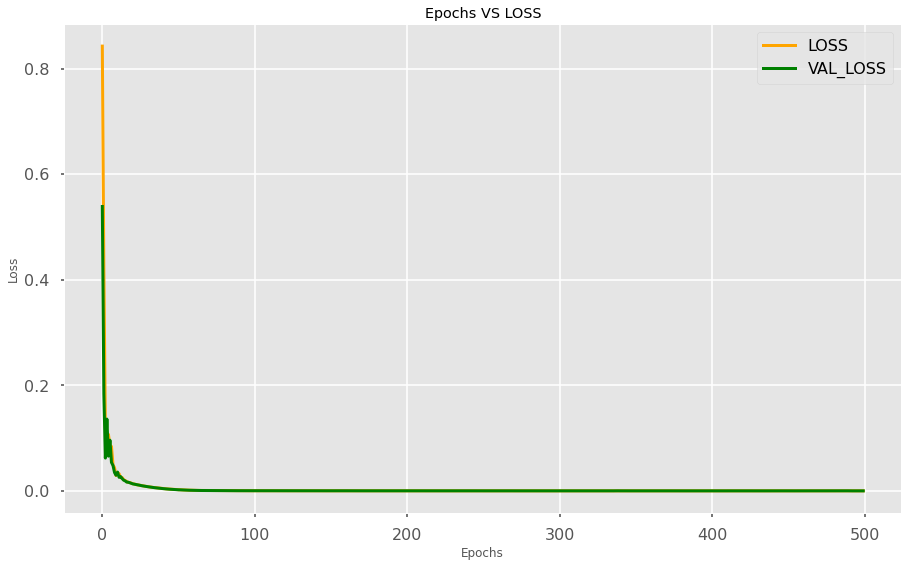

In [12]:
plt.style.use("ggplot")
plt.figure(figsize = (15, 9))
plt.plot(trainedModel.history["loss"], c = "orange", linestyle = "solid", linewidth = 3, label = "LOSS")
plt.plot(trainedModel.history["val_loss"], c = "green", linestyle = "solid", linewidth = 3, label = "VAL_LOSS")
plt.title("Epochs VS LOSS")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
# Doing forecast using Wrong Approach
trueLabels = forecast[limit : ]
predictions = []

index = limit
while len(predictions) < len(trueLabels):
    temp = model.predict(data[index].reshape(1, -1, 1))[0, 0]
    index += 1
    predictions.append(temp)

In [14]:
data[0].reshape(1, -1, 1).shape

(1, 15, 1)

In [15]:
data.shape

(185, 15, 1)

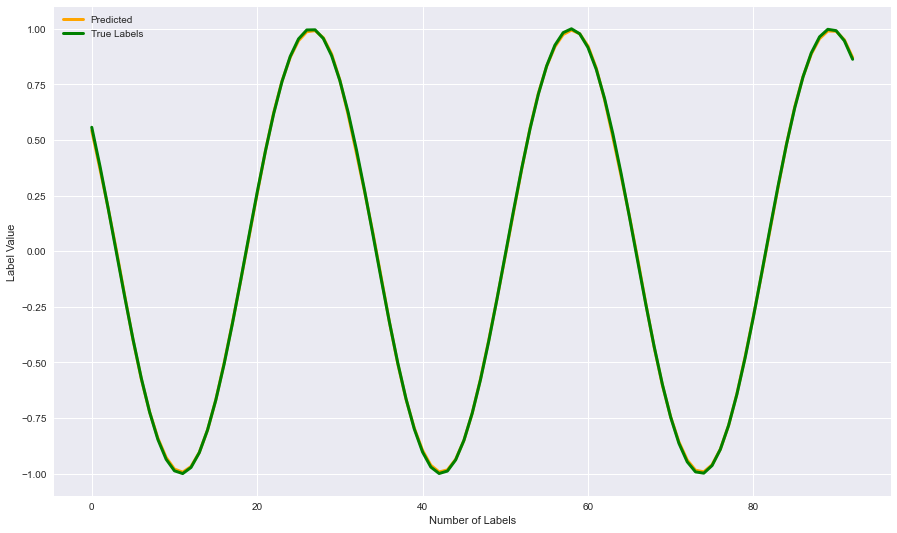

In [16]:
plt.style.use("seaborn")
plt.figure(figsize = (15, 9))
plt.plot(predictions, c = "orange", linestyle = "solid", linewidth = 3, label = "Predicted")
plt.plot(trueLabels, c = "green", linestyle = "solid", linewidth = 3, label = "True Labels")
plt.xlabel("Number of Labels")
plt.ylabel("Label Value")
plt.legend()
plt.show()

In [17]:
# Forecasting with the Correct Approach
trueLabels = forecast[limit : ]
predictions = []

last_Value_Of_Data = data[limit]
while len(predictions) < len(trueLabels):
    temp = model.predict(last_Value_Of_Data.reshape(1, -1, 1))[0, 0]
    predictions.append(temp)
    
    last_Value_Of_Data = np.roll(last_Value_Of_Data, -1)
    last_Value_Of_Data[-1] = temp

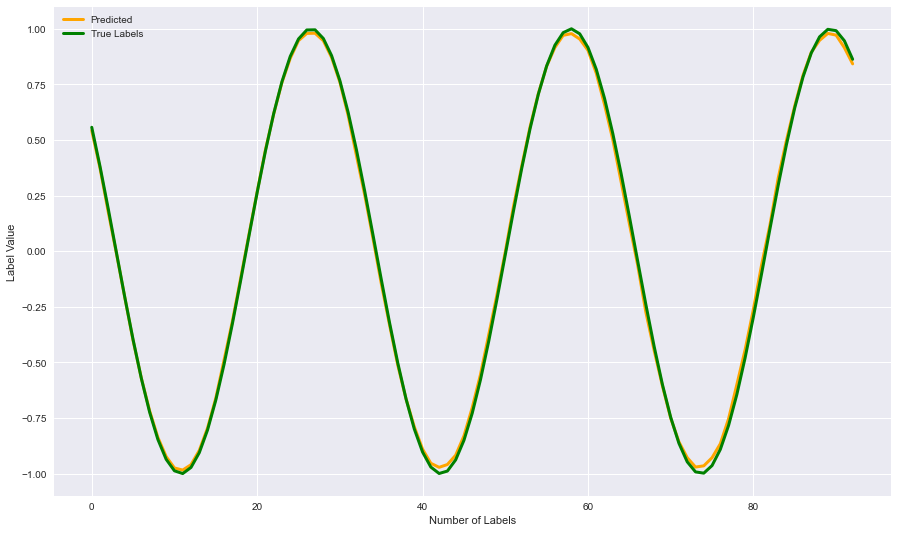

In [18]:
plt.style.use("seaborn")
plt.figure(figsize = (15, 9))
plt.plot(predictions, c = "orange", linestyle = "solid", linewidth = 3, label = "Predicted")
plt.plot(trueLabels, c = "green", linestyle = "solid", linewidth = 3, label = "True Labels")
plt.xlabel("Number of Labels")
plt.ylabel("Label Value")
plt.legend()
plt.show()

***Reason behind the RNN having slightly deviated predictions in this case is It provides much more flexibility than a linear model, & in the present case the data dimensionality is low, that is why linear model fits exact tot this & RNN not. But in future, where multiple dimensions data is there, or where linear model is applicable, there RNN are very powerful. Check out the below section in which RNN is implemented with activation None, which makes RNN also a linear Model!***

## Building the Model with Activation None

In [19]:
inputShape = Input(shape = (T, Dimension))

# Here by default activation function is Tanh
RNNModel = SimpleRNN(5, activation = None)(inputShape)
RNNModel = Dense(1)(RNNModel)

model = Model(inputShape, RNNModel)

model.compile(loss = "mse", optimizer = Adam(lr = 0.01))
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 15, 1)]           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [20]:
limit = data.shape[0] // 2

# Fitting the Model
trainedModel = model.fit(
                            data[ :limit],
                            forecast[ :limit],
                            epochs = 500,
    
                            # Reason for taking the validation set as complete seprate half, because in forecast
                            # validation should always be done on future dataset.
                            validation_data = (data[limit: ], forecast[limit: ])
                           )

Epoch 1/500
3/3 [==============================] - 0s 72ms/step - loss: 1.5665 - val_loss: 0.5159
Epoch 2/500
3/3 [==============================] - 0s 13ms/step - loss: 0.3722 - val_loss: 0.1112
Epoch 3/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0712 - val_loss: 0.0154
Epoch 4/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0147 - val_loss: 0.0257
Epoch 5/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0346 - val_loss: 0.0515
Epoch 6/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0544 - val_loss: 0.0563
Epoch 7/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0537 - val_loss: 0.0492
Epoch 8/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0470 - val_loss: 0.0445
Epoch 9/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0433 - val_loss: 0.0416
Epoch 10/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0405 - val_loss: 0.0357
Epoch 11/500
3/3 [=

3/3 [==============================] - 0s 24ms/step - loss: 5.9689e-12 - val_loss: 5.3209e-13
Epoch 79/500
3/3 [==============================] - 0s 22ms/step - loss: 1.7750e-12 - val_loss: 5.9209e-12
Epoch 80/500
3/3 [==============================] - 0s 20ms/step - loss: 7.0072e-12 - val_loss: 7.3403e-12
Epoch 81/500
3/3 [==============================] - 0s 15ms/step - loss: 6.7867e-12 - val_loss: 6.4579e-12
Epoch 82/500
3/3 [==============================] - 0s 23ms/step - loss: 6.5771e-12 - val_loss: 6.2668e-12
Epoch 83/500
3/3 [==============================] - 0s 16ms/step - loss: 5.2023e-12 - val_loss: 3.0574e-12
Epoch 84/500
3/3 [==============================] - 0s 16ms/step - loss: 2.5812e-12 - val_loss: 1.6727e-12
Epoch 85/500
3/3 [==============================] - 0s 14ms/step - loss: 1.2215e-12 - val_loss: 3.4107e-13
Epoch 86/500
3/3 [==============================] - 0s 12ms/step - loss: 1.6635e-13 - val_loss: 1.5347e-13
Epoch 87/500
3/3 [==============================] 

3/3 [==============================] - 0s 19ms/step - loss: 1.0932e-14 - val_loss: 8.3892e-15
Epoch 155/500
3/3 [==============================] - 0s 20ms/step - loss: 1.0742e-14 - val_loss: 1.0363e-14
Epoch 156/500
3/3 [==============================] - 0s 17ms/step - loss: 1.4304e-14 - val_loss: 1.0566e-14
Epoch 157/500
3/3 [==============================] - 0s 22ms/step - loss: 1.1171e-14 - val_loss: 8.5699e-15
Epoch 158/500
3/3 [==============================] - 0s 17ms/step - loss: 1.2831e-14 - val_loss: 6.9475e-15
Epoch 159/500
3/3 [==============================] - 0s 17ms/step - loss: 1.1419e-14 - val_loss: 1.1091e-14
Epoch 160/500
3/3 [==============================] - 0s 15ms/step - loss: 1.1245e-14 - val_loss: 1.1473e-14
Epoch 161/500
3/3 [==============================] - 0s 13ms/step - loss: 1.2032e-14 - val_loss: 8.2702e-15
Epoch 162/500
3/3 [==============================] - 0s 22ms/step - loss: 1.0742e-14 - val_loss: 1.0160e-14
Epoch 163/500
3/3 [=======================

Epoch 230/500
3/3 [==============================] - 0s 10ms/step - loss: 1.1925e-14 - val_loss: 1.0874e-14
Epoch 231/500
3/3 [==============================] - 0s 15ms/step - loss: 9.1108e-15 - val_loss: 9.5189e-15
Epoch 232/500
3/3 [==============================] - 0s 14ms/step - loss: 9.3984e-15 - val_loss: 9.3805e-15
Epoch 233/500
3/3 [==============================] - 0s 10ms/step - loss: 1.1157e-14 - val_loss: 9.0797e-15
Epoch 234/500
3/3 [==============================] - 0s 12ms/step - loss: 9.8464e-15 - val_loss: 9.8610e-15
Epoch 235/500
3/3 [==============================] - 0s 11ms/step - loss: 1.0436e-14 - val_loss: 9.2211e-15
Epoch 236/500
3/3 [==============================] - 0s 11ms/step - loss: 1.0262e-14 - val_loss: 9.1925e-15
Epoch 237/500
3/3 [==============================] - 0s 11ms/step - loss: 1.1309e-14 - val_loss: 9.5355e-15
Epoch 238/500
3/3 [==============================] - 0s 12ms/step - loss: 1.1445e-14 - val_loss: 9.4829e-15
Epoch 239/500
3/3 [=========

3/3 [==============================] - 0s 26ms/step - loss: 1.0823e-14 - val_loss: 9.2144e-15
Epoch 306/500
3/3 [==============================] - 0s 16ms/step - loss: 1.0140e-14 - val_loss: 8.8623e-15
Epoch 307/500
3/3 [==============================] - 0s 16ms/step - loss: 1.3559e-14 - val_loss: 1.0011e-14
Epoch 308/500
3/3 [==============================] - 0s 20ms/step - loss: 1.0102e-14 - val_loss: 9.2837e-15
Epoch 309/500
3/3 [==============================] - 0s 16ms/step - loss: 1.3607e-14 - val_loss: 9.1236e-15
Epoch 310/500
3/3 [==============================] - 0s 18ms/step - loss: 9.6365e-15 - val_loss: 1.5326e-14
Epoch 311/500
3/3 [==============================] - 0s 16ms/step - loss: 1.3451e-14 - val_loss: 9.1103e-15
Epoch 312/500
3/3 [==============================] - 0s 14ms/step - loss: 1.2403e-14 - val_loss: 8.8592e-15
Epoch 313/500
3/3 [==============================] - 0s 14ms/step - loss: 1.0065e-14 - val_loss: 1.2542e-14
Epoch 314/500
3/3 [=======================

Epoch 381/500
3/3 [==============================] - 0s 25ms/step - loss: 1.0014e-14 - val_loss: 7.8551e-15
Epoch 382/500
3/3 [==============================] - 0s 18ms/step - loss: 9.0094e-15 - val_loss: 1.0666e-14
Epoch 383/500
3/3 [==============================] - 0s 18ms/step - loss: 1.1285e-14 - val_loss: 8.1442e-15
Epoch 384/500
3/3 [==============================] - 0s 22ms/step - loss: 1.1004e-14 - val_loss: 1.1300e-14
Epoch 385/500
3/3 [==============================] - 0s 12ms/step - loss: 8.0045e-15 - val_loss: 8.2753e-15
Epoch 386/500
3/3 [==============================] - 0s 13ms/step - loss: 1.2014e-14 - val_loss: 8.6217e-15
Epoch 387/500
3/3 [==============================] - 0s 13ms/step - loss: 1.0682e-14 - val_loss: 7.8236e-15
Epoch 388/500
3/3 [==============================] - 0s 12ms/step - loss: 9.8715e-15 - val_loss: 7.3438e-15
Epoch 389/500
3/3 [==============================] - 0s 13ms/step - loss: 9.8336e-15 - val_loss: 9.4968e-15
Epoch 390/500
3/3 [=========

Epoch 457/500
3/3 [==============================] - 0s 13ms/step - loss: 1.1052e-14 - val_loss: 8.9894e-15
Epoch 458/500
3/3 [==============================] - 0s 11ms/step - loss: 1.1389e-14 - val_loss: 8.0125e-15
Epoch 459/500
3/3 [==============================] - 0s 10ms/step - loss: 1.0162e-14 - val_loss: 6.9122e-15
Epoch 460/500
3/3 [==============================] - 0s 13ms/step - loss: 1.1178e-14 - val_loss: 6.6704e-15
Epoch 461/500
3/3 [==============================] - 0s 10ms/step - loss: 1.1211e-14 - val_loss: 8.0823e-15
Epoch 462/500
3/3 [==============================] - 0s 11ms/step - loss: 9.5311e-15 - val_loss: 1.2812e-14
Epoch 463/500
3/3 [==============================] - 0s 11ms/step - loss: 1.6081e-14 - val_loss: 1.0589e-14
Epoch 464/500
3/3 [==============================] - 0s 12ms/step - loss: 9.2603e-15 - val_loss: 8.6459e-15
Epoch 465/500
3/3 [==============================] - 0s 12ms/step - loss: 9.9088e-15 - val_loss: 8.8848e-15
Epoch 466/500
3/3 [=========

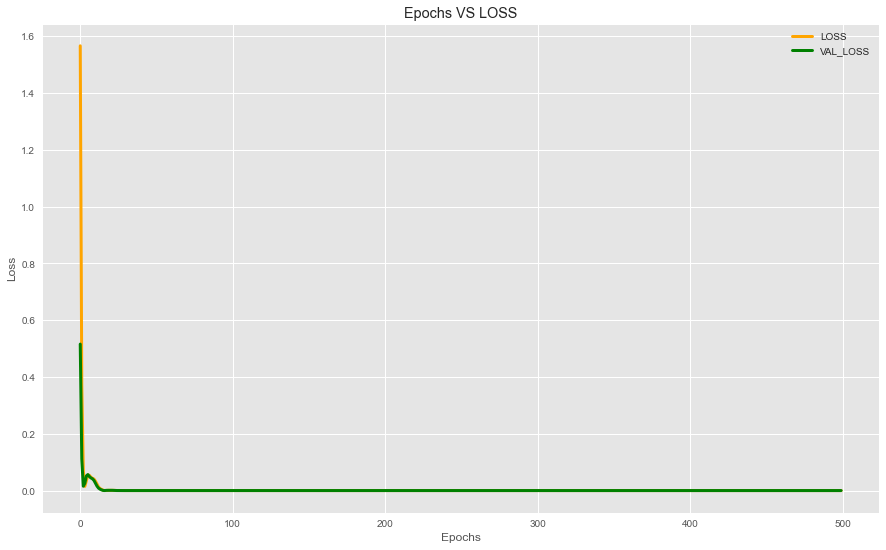

In [21]:
plt.style.use("ggplot")
plt.figure(figsize = (15, 9))
plt.plot(trainedModel.history["loss"], c = "orange", linestyle = "solid", linewidth = 3, label = "LOSS")
plt.plot(trainedModel.history["val_loss"], c = "green", linestyle = "solid", linewidth = 3, label = "VAL_LOSS")
plt.title("Epochs VS LOSS")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [22]:
# Doing forecast using Wrong Approach
trueLabels = forecast[limit : ]
predictions = []

index = limit
while len(predictions) < len(trueLabels):
    temp = model.predict(data[index].reshape(1, -1, 1))[0, 0]
    index += 1
    predictions.append(temp)

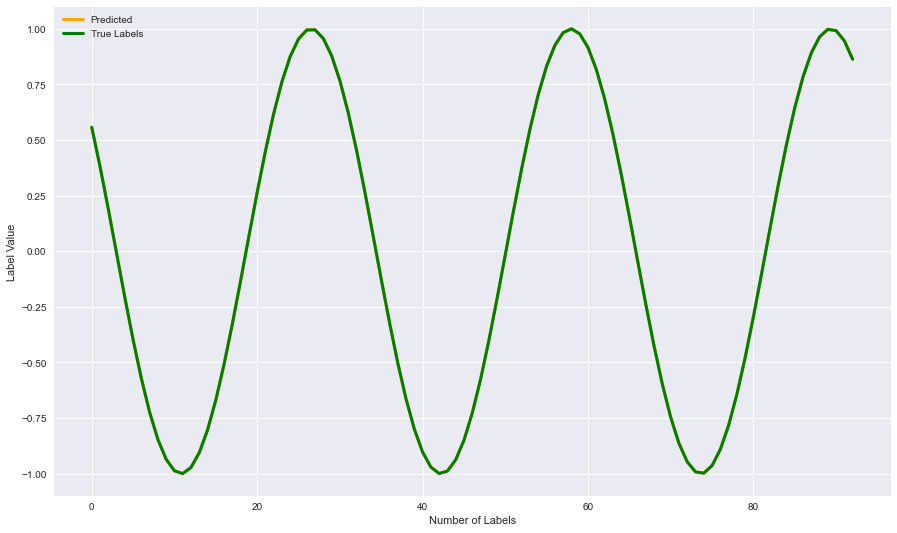

In [23]:
plt.style.use("seaborn")
plt.figure(figsize = (15, 9))
plt.plot(predictions, c = "orange", linestyle = "solid", linewidth = 3, label = "Predicted")
plt.plot(trueLabels, c = "green", linestyle = "solid", linewidth = 3, label = "True Labels")
plt.xlabel("Number of Labels")
plt.ylabel("Label Value")
plt.legend()
plt.show()

In [24]:
# Forecasting with the Correct Approach
trueLabels = forecast[limit : ]
predictions = []

last_Value_Of_Data = data[limit]
while len(predictions) < len(trueLabels):
    temp = model.predict(last_Value_Of_Data.reshape(1, -1, 1))[0, 0]
    predictions.append(temp)
    
    last_Value_Of_Data = np.roll(last_Value_Of_Data, -1)
    last_Value_Of_Data[-1] = temp

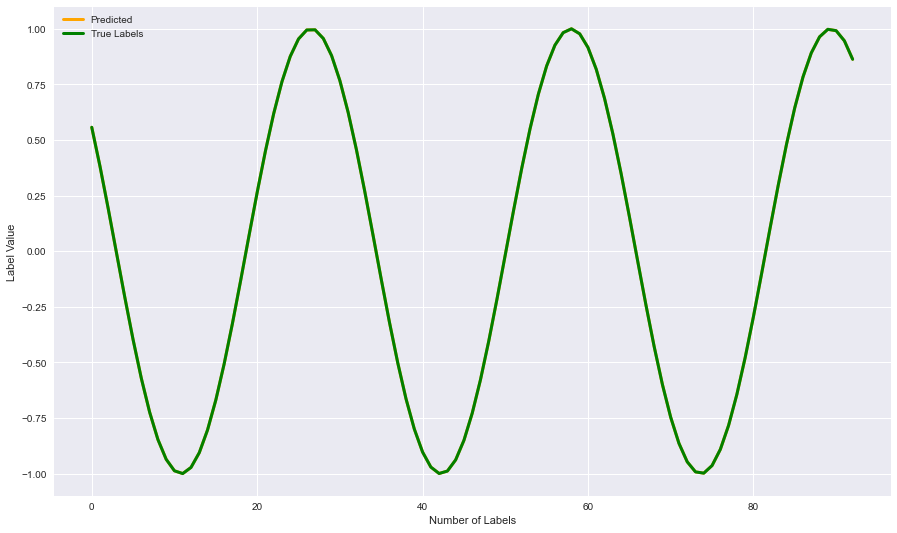

In [25]:
plt.style.use("seaborn")
plt.figure(figsize = (15, 9))
plt.plot(predictions, c = "orange", linestyle = "solid", linewidth = 3, label = "Predicted")
plt.plot(trueLabels, c = "green", linestyle = "solid", linewidth = 3, label = "True Labels")
plt.xlabel("Number of Labels")
plt.ylabel("Label Value")
plt.legend()
plt.show()

## RNN on noisy Data

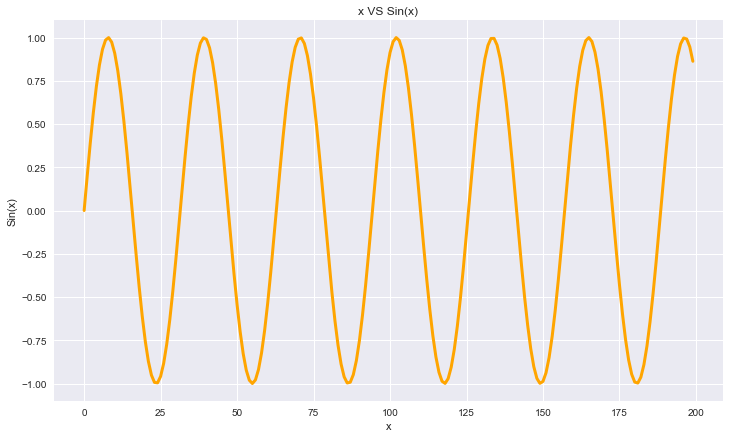

In [26]:
seriesData = np.sin(0.2 * np.arange(200)) + np.random.randn(200) * 0.2
plt.figure(figsize = (12, 7))
plt.plot(syntheticTimeSeriesData, c = "orange", linestyle = "solid", linewidth = 3)
plt.title("x VS Sin(x)")
plt.xlabel("x")
plt.ylabel("Sin(x)")
plt.show()

In [27]:
T = 15
Dimension = 1
data = []
forecast = []

for t in range(len(seriesData) - T):
    data.append(
        seriesData[t : t + T]
    )
    forecast.append(
        seriesData[t + T]
    )

data = np.array(data)
forecast = np.array(forecast)

In [28]:
inputShape = Input(shape = (T, Dimension))

# Here by default activation function is Tanh
RNNModel = SimpleRNN(5, activation = None)(inputShape)
RNNModel = Dense(1)(RNNModel)

RNNModel = Model(inputShape, RNNModel)

RNNModel.compile(loss = "mse", optimizer = Adam(lr = 0.01))
RNNModel.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 15, 1)]           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [30]:
limit = data.shape[0] // 2

# Fitting the Model
trainedModel = RNNModel.fit(
                            data[ :limit],
                            forecast[ :limit],
                            epochs = 500,
    
                            # Reason for taking the validation set as complete seprate half, because in forecast
                            # validation should always be done on future dataset.
                            validation_data = (data[limit: ], forecast[limit: ])
                           )

Epoch 1/500
3/3 [==============================] - 0s 89ms/step - loss: 2.4762 - val_loss: 1.2473
Epoch 2/500
3/3 [==============================] - 0s 17ms/step - loss: 1.1927 - val_loss: 0.7715
Epoch 3/500
3/3 [==============================] - 0s 17ms/step - loss: 0.7868 - val_loss: 0.5639
Epoch 4/500
3/3 [==============================] - 0s 18ms/step - loss: 0.5679 - val_loss: 0.4413
Epoch 5/500
3/3 [==============================] - 0s 21ms/step - loss: 0.4359 - val_loss: 0.3597
Epoch 6/500
3/3 [==============================] - 0s 18ms/step - loss: 0.3356 - val_loss: 0.3389
Epoch 7/500
3/3 [==============================] - 0s 17ms/step - loss: 0.2932 - val_loss: 0.3522
Epoch 8/500
3/3 [==============================] - 0s 16ms/step - loss: 0.2767 - val_loss: 0.2937
Epoch 9/500
3/3 [==============================] - 0s 15ms/step - loss: 0.2318 - val_loss: 0.2364
Epoch 10/500
3/3 [==============================] - 0s 16ms/step - loss: 0.2030 - val_loss: 0.2094
Epoch 11/500
3/3 [=

Epoch 84/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0775 - val_loss: 0.0811
Epoch 85/500
3/3 [==============================] - 0s 24ms/step - loss: 0.0746 - val_loss: 0.0830
Epoch 86/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0753 - val_loss: 0.0808
Epoch 87/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0744 - val_loss: 0.0764
Epoch 88/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0759 - val_loss: 0.0802
Epoch 89/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0741 - val_loss: 0.0784
Epoch 90/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0741 - val_loss: 0.0771
Epoch 91/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0753 - val_loss: 0.0789
Epoch 92/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0738 - val_loss: 0.0783
Epoch 93/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0749 - val_loss: 0.0768
Epoch 94/5

3/3 [==============================] - 0s 10ms/step - loss: 0.0720 - val_loss: 0.0714
Epoch 167/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0720 - val_loss: 0.0769
Epoch 168/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0694 - val_loss: 0.0710
Epoch 169/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0708 - val_loss: 0.0721
Epoch 170/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0687 - val_loss: 0.0748
Epoch 171/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0696 - val_loss: 0.0727
Epoch 172/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0722 - val_loss: 0.0721
Epoch 173/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0692 - val_loss: 0.0772
Epoch 174/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0713 - val_loss: 0.0716
Epoch 175/500
3/3 [==============================] - 0s 25ms/step - loss: 0.0688 - val_loss: 0.0713
Epoch 176/500
3/

Epoch 248/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0695 - val_loss: 0.0732
Epoch 249/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0703 - val_loss: 0.0770
Epoch 250/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0693 - val_loss: 0.0721
Epoch 251/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0707 - val_loss: 0.0725
Epoch 252/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0700 - val_loss: 0.0696
Epoch 253/500
3/3 [==============================] - 0s 42ms/step - loss: 0.0684 - val_loss: 0.0720
Epoch 254/500
3/3 [==============================] - 0s 55ms/step - loss: 0.0687 - val_loss: 0.0796
Epoch 255/500
3/3 [==============================] - 0s 95ms/step - loss: 0.0692 - val_loss: 0.0700
Epoch 256/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0678 - val_loss: 0.0703
Epoch 257/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0675 - val_loss: 0.0711


Epoch 330/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0672 - val_loss: 0.0704
Epoch 331/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0694 - val_loss: 0.0708
Epoch 332/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0663 - val_loss: 0.0710
Epoch 333/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0681 - val_loss: 0.0692
Epoch 334/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0669 - val_loss: 0.0744
Epoch 335/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0698 - val_loss: 0.0687
Epoch 336/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0687 - val_loss: 0.0705
Epoch 337/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0673 - val_loss: 0.0741
Epoch 338/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0655 - val_loss: 0.0704
Epoch 339/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0668 - val_loss: 0.0698


3/3 [==============================] - 0s 10ms/step - loss: 0.0675 - val_loss: 0.0693
Epoch 413/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0663 - val_loss: 0.0693
Epoch 414/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0666 - val_loss: 0.0690
Epoch 415/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0655 - val_loss: 0.0703
Epoch 416/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0661 - val_loss: 0.0709
Epoch 417/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0686 - val_loss: 0.0696
Epoch 418/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0651 - val_loss: 0.0695
Epoch 419/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0674 - val_loss: 0.0716
Epoch 420/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0694 - val_loss: 0.0686
Epoch 421/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0691 - val_loss: 0.0689
Epoch 422/500


3/3 [==============================] - 0s 13ms/step - loss: 0.0665 - val_loss: 0.0717
Epoch 495/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0672 - val_loss: 0.0708
Epoch 496/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0673 - val_loss: 0.0716
Epoch 497/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0656 - val_loss: 0.0685
Epoch 498/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0696 - val_loss: 0.0688
Epoch 499/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0680 - val_loss: 0.0794
Epoch 500/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0700 - val_loss: 0.0692


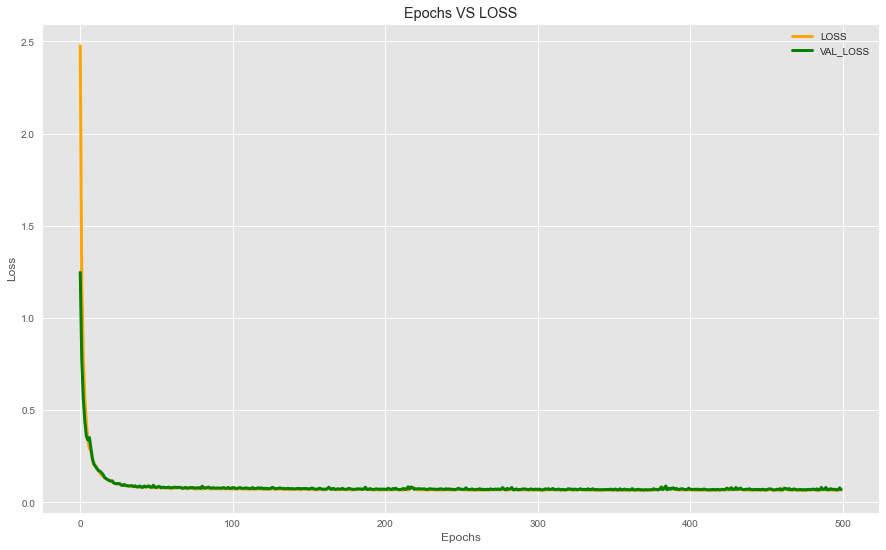

In [31]:
plt.style.use("ggplot")
plt.figure(figsize = (15, 9))
plt.plot(trainedModel.history["loss"], c = "orange", linestyle = "solid", linewidth = 3, label = "LOSS")
plt.plot(trainedModel.history["val_loss"], c = "green", linestyle = "solid", linewidth = 3, label = "VAL_LOSS")
plt.title("Epochs VS LOSS")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [32]:
# Doing forecast using Wrong Approach
trueLabels = forecast[limit : ]
predictions = []

index = limit
while len(predictions) < len(trueLabels):
    temp = RNNModel.predict(data[index].reshape(1, -1, 1))[0, 0]
    index += 1
    predictions.append(temp)

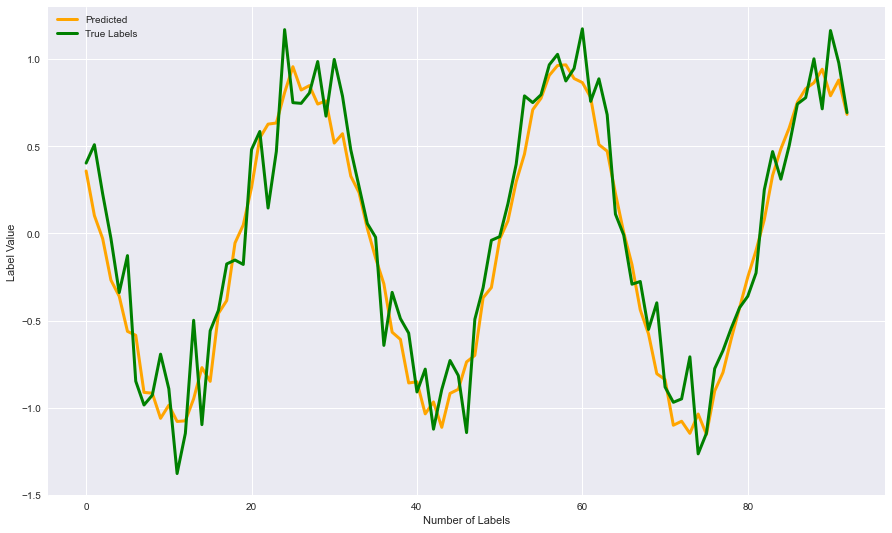

In [33]:
plt.style.use("seaborn")
plt.figure(figsize = (15, 9))
plt.plot(predictions, c = "orange", linestyle = "solid", linewidth = 3, label = "Predicted")
plt.plot(trueLabels, c = "green", linestyle = "solid", linewidth = 3, label = "True Labels")
plt.xlabel("Number of Labels")
plt.ylabel("Label Value")
plt.legend()
plt.show()

In [34]:
# Forecasting with the Correct Approach
trueLabels = forecast[limit : ]
predictions = []

last_Value_Of_Data = data[limit]
while len(predictions) < len(trueLabels):
    temp = RNNModel.predict(last_Value_Of_Data.reshape(1, -1, 1))[0, 0]
    predictions.append(temp)
    
    last_Value_Of_Data = np.roll(last_Value_Of_Data, -1)
    last_Value_Of_Data[-1] = temp

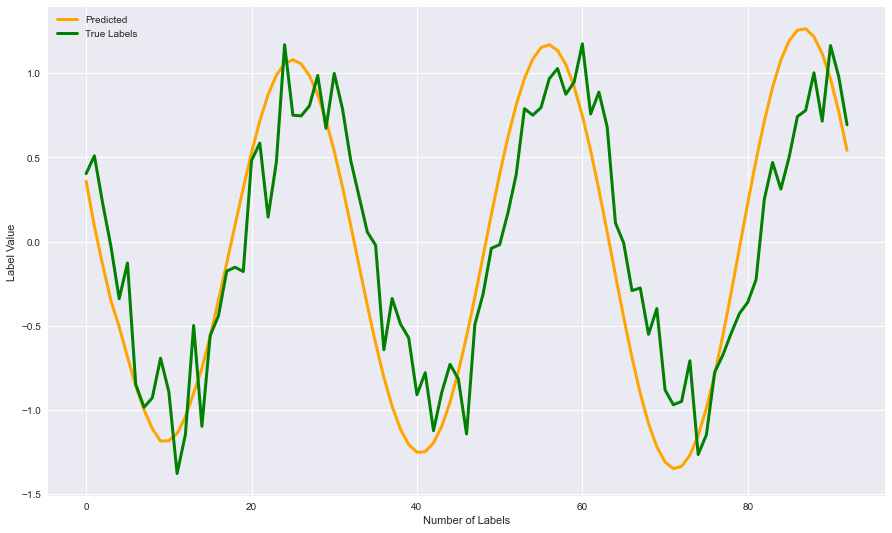

In [35]:
plt.style.use("seaborn")
plt.figure(figsize = (15, 9))
plt.plot(predictions, c = "orange", linestyle = "solid", linewidth = 3, label = "Predicted")
plt.plot(trueLabels, c = "green", linestyle = "solid", linewidth = 3, label = "True Labels")
plt.xlabel("Number of Labels")
plt.ylabel("Label Value")
plt.legend()
plt.show()

In [63]:
inputShape = Input(shape = (T, Dimension))

# Here by default activation function is Tanh
RNNModel = SimpleRNN(5, activation = "tanh")(inputShape)
RNNModel = Dense(1)(RNNModel)

RNNModel = Model(inputShape, RNNModel)

RNNModel.compile(loss = "mse", optimizer = Adam(lr = 0.01))
RNNModel.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 15, 1)]           0         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [64]:
limit = data.shape[0] // 2

# Fitting the Model
trainedModel = RNNModel.fit(
                            data[ :limit],
                            forecast[ :limit],
                            epochs = 500,
    
                            # Reason for taking the validation set as complete seprate half, because in forecast
                            # validation should always be done on future dataset.
                            validation_data = (data[limit: ], forecast[limit: ])
                           )

Epoch 1/500
3/3 [==============================] - 0s 73ms/step - loss: 0.8089 - val_loss: 0.4479
Epoch 2/500
3/3 [==============================] - 0s 14ms/step - loss: 0.5089 - val_loss: 0.2647
Epoch 3/500
3/3 [==============================] - 0s 16ms/step - loss: 0.3301 - val_loss: 0.1673
Epoch 4/500
3/3 [==============================] - 0s 19ms/step - loss: 0.2536 - val_loss: 0.1238
Epoch 5/500
3/3 [==============================] - 0s 22ms/step - loss: 0.2057 - val_loss: 0.1091
Epoch 6/500
3/3 [==============================] - 0s 18ms/step - loss: 0.1819 - val_loss: 0.1009
Epoch 7/500
3/3 [==============================] - 0s 19ms/step - loss: 0.1694 - val_loss: 0.0921
Epoch 8/500
3/3 [==============================] - 0s 17ms/step - loss: 0.1444 - val_loss: 0.0843
Epoch 9/500
3/3 [==============================] - 0s 13ms/step - loss: 0.1256 - val_loss: 0.0783
Epoch 10/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1088 - val_loss: 0.0759
Epoch 11/500
3/3 [=

3/3 [==============================] - 0s 14ms/step - loss: 0.0512 - val_loss: 0.0474
Epoch 84/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0519 - val_loss: 0.0476
Epoch 85/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0505 - val_loss: 0.0455
Epoch 86/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0510 - val_loss: 0.0447
Epoch 87/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0507 - val_loss: 0.0459
Epoch 88/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0514 - val_loss: 0.0482
Epoch 89/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0507 - val_loss: 0.0463
Epoch 90/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0506 - val_loss: 0.0445
Epoch 91/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0506 - val_loss: 0.0461
Epoch 92/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0500 - val_loss: 0.0465
Epoch 93/500
3/3 [=====

3/3 [==============================] - 0s 12ms/step - loss: 0.0485 - val_loss: 0.0602
Epoch 166/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0482 - val_loss: 0.0527
Epoch 167/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0497 - val_loss: 0.0494
Epoch 168/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0464 - val_loss: 0.0516
Epoch 169/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0475 - val_loss: 0.0495
Epoch 170/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0440 - val_loss: 0.0491
Epoch 171/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0454 - val_loss: 0.0541
Epoch 172/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0460 - val_loss: 0.0532
Epoch 173/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0451 - val_loss: 0.0475
Epoch 174/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0451 - val_loss: 0.0465
Epoch 175/500


3/3 [==============================] - 0s 13ms/step - loss: 0.0469 - val_loss: 0.0565
Epoch 248/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0415 - val_loss: 0.0480
Epoch 249/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0452 - val_loss: 0.0560
Epoch 250/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0466 - val_loss: 0.0579
Epoch 251/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0443 - val_loss: 0.0463
Epoch 252/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0435 - val_loss: 0.0553
Epoch 253/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0439 - val_loss: 0.0578
Epoch 254/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0435 - val_loss: 0.0477
Epoch 255/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0432 - val_loss: 0.0518
Epoch 256/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0430 - val_loss: 0.0544
Epoch 257/500


3/3 [==============================] - 0s 10ms/step - loss: 0.0402 - val_loss: 0.0522
Epoch 330/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0398 - val_loss: 0.0537
Epoch 331/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0394 - val_loss: 0.0534
Epoch 332/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0399 - val_loss: 0.0572
Epoch 333/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0390 - val_loss: 0.0577
Epoch 334/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0407 - val_loss: 0.0579
Epoch 335/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0388 - val_loss: 0.0585
Epoch 336/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0388 - val_loss: 0.0535
Epoch 337/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0419 - val_loss: 0.0523
Epoch 338/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0396 - val_loss: 0.0681
Epoch 339/500


3/3 [==============================] - 0s 12ms/step - loss: 0.0390 - val_loss: 0.0593
Epoch 412/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0384 - val_loss: 0.0515
Epoch 413/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0382 - val_loss: 0.0566
Epoch 414/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0404 - val_loss: 0.0569
Epoch 415/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0368 - val_loss: 0.0504
Epoch 416/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0415 - val_loss: 0.0618
Epoch 417/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0420 - val_loss: 0.0533
Epoch 418/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0462 - val_loss: 0.0500
Epoch 419/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0399 - val_loss: 0.0680
Epoch 420/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0418 - val_loss: 0.0523
Epoch 421/500


3/3 [==============================] - 0s 12ms/step - loss: 0.0350 - val_loss: 0.0563
Epoch 494/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0350 - val_loss: 0.0577
Epoch 495/500
3/3 [==============================] - 0s 22ms/step - loss: 0.0351 - val_loss: 0.0611
Epoch 496/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0349 - val_loss: 0.0608
Epoch 497/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0347 - val_loss: 0.0635
Epoch 498/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0350 - val_loss: 0.0602
Epoch 499/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0342 - val_loss: 0.0613
Epoch 500/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0348 - val_loss: 0.0613


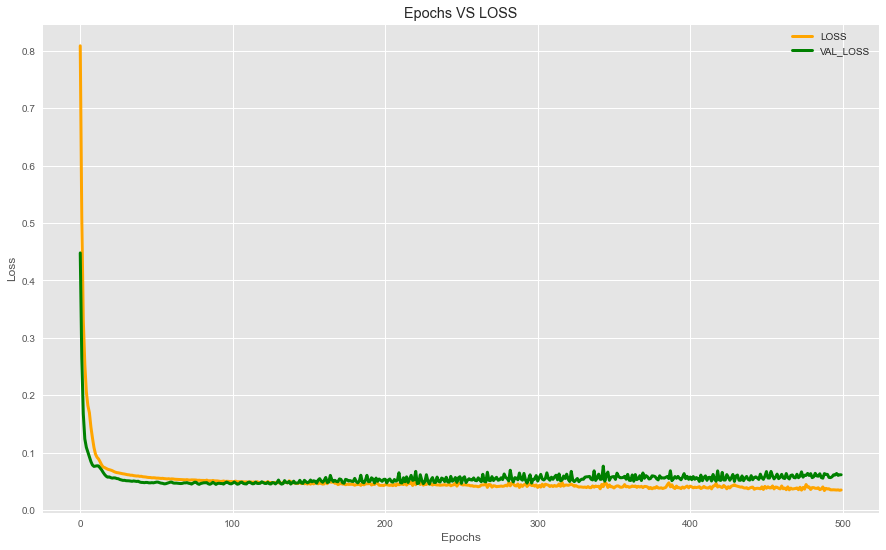

In [65]:
plt.style.use("ggplot")
plt.figure(figsize = (15, 9))
plt.plot(trainedModel.history["loss"], c = "orange", linestyle = "solid", linewidth = 3, label = "LOSS")
plt.plot(trainedModel.history["val_loss"], c = "green", linestyle = "solid", linewidth = 3, label = "VAL_LOSS")
plt.title("Epochs VS LOSS")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [66]:
# Doing forecast using Wrong Approach
trueLabels = forecast[limit : ]
predictions = []

index = limit
while len(predictions) < len(trueLabels):
    temp = RNNModel.predict(data[index].reshape(1, -1, 1))[0, 0]
    index += 1
    predictions.append(temp)

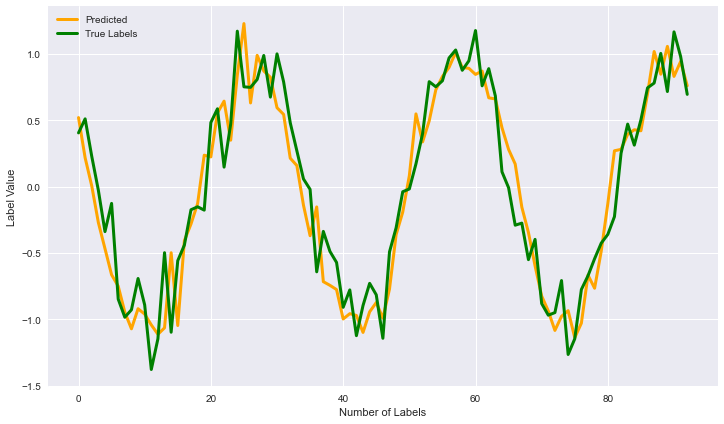

In [67]:
plt.style.use("seaborn")
plt.figure(figsize = (12, 7))
plt.plot(predictions, c = "orange", linestyle = "solid", linewidth = 3, label = "Predicted")
plt.plot(trueLabels, c = "green", linestyle = "solid", linewidth = 3, label = "True Labels")
plt.xlabel("Number of Labels")
plt.ylabel("Label Value")
plt.legend()
plt.show()

In [68]:
# Forecasting with the Correct Approach
trueLabels = forecast[limit : ]
predictions = []

last_Value_Of_Data = data[limit]
while len(predictions) < len(trueLabels):
    temp = RNNModel.predict(last_Value_Of_Data.reshape(1, -1, 1))[0, 0]
    predictions.append(temp)
    
    last_Value_Of_Data = np.roll(last_Value_Of_Data, -1)
    last_Value_Of_Data[-1] = temp

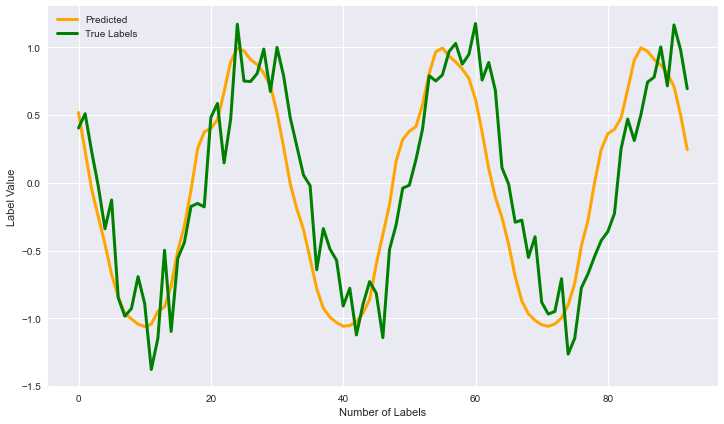

In [69]:
plt.style.use("seaborn")
plt.figure(figsize = (12, 7))
plt.plot(predictions, c = "orange", linestyle = "solid", linewidth = 3, label = "Predicted")
plt.plot(trueLabels, c = "green", linestyle = "solid", linewidth = 3, label = "True Labels")
plt.xlabel("Number of Labels")
plt.ylabel("Label Value")
plt.legend()
plt.show()

## RNN with RELU activation function

In [70]:
inputShape = Input(shape = (T, Dimension))

# Here by default activation function is Tanh
RNNModel = SimpleRNN(5, activation = "relu")(inputShape)
RNNModel = Dense(1)(RNNModel)

RNNModel = Model(inputShape, RNNModel)

RNNModel.compile(loss = "mse", optimizer = Adam(lr = 0.01))
RNNModel.summary()

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 15, 1)]           0         
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [71]:
limit = data.shape[0] // 2

# Fitting the Model
trainedModel = RNNModel.fit(
                            data[ :limit],
                            forecast[ :limit],
                            epochs = 500,
    
                            # Reason for taking the validation set as complete seprate half, because in forecast
                            # validation should always be done on future dataset.
                            validation_data = (data[limit: ], forecast[limit: ])
                           )

Epoch 1/500
3/3 [==============================] - 0s 70ms/step - loss: 0.4948 - val_loss: 0.3397
Epoch 2/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3995 - val_loss: 0.2659
Epoch 3/500
3/3 [==============================] - 0s 15ms/step - loss: 0.3177 - val_loss: 0.2100
Epoch 4/500
3/3 [==============================] - 0s 15ms/step - loss: 0.2552 - val_loss: 0.1682
Epoch 5/500
3/3 [==============================] - 0s 13ms/step - loss: 0.2015 - val_loss: 0.1392
Epoch 6/500
3/3 [==============================] - 0s 16ms/step - loss: 0.1674 - val_loss: 0.1209
Epoch 7/500
3/3 [==============================] - 0s 17ms/step - loss: 0.1463 - val_loss: 0.1106
Epoch 8/500
3/3 [==============================] - 0s 14ms/step - loss: 0.1312 - val_loss: 0.1063
Epoch 9/500
3/3 [==============================] - 0s 13ms/step - loss: 0.1225 - val_loss: 0.1052
Epoch 10/500
3/3 [==============================] - 0s 14ms/step - loss: 0.1188 - val_loss: 0.1034
Epoch 11/500
3/3 [=

3/3 [==============================] - 0s 15ms/step - loss: 0.0902 - val_loss: 0.0899
Epoch 84/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0902 - val_loss: 0.0905
Epoch 85/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0900 - val_loss: 0.0913
Epoch 86/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0901 - val_loss: 0.0927
Epoch 87/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0897 - val_loss: 0.0933
Epoch 88/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0899 - val_loss: 0.0947
Epoch 89/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0896 - val_loss: 0.0950
Epoch 90/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0898 - val_loss: 0.0956
Epoch 91/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0897 - val_loss: 0.0962
Epoch 92/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0894 - val_loss: 0.0974
Epoch 93/500
3/3 [=====

Epoch 165/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0859 - val_loss: 0.1090
Epoch 166/500
3/3 [==============================] - 0s 25ms/step - loss: 0.0860 - val_loss: 0.1090
Epoch 167/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0867 - val_loss: 0.1098
Epoch 168/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0861 - val_loss: 0.1075
Epoch 169/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0869 - val_loss: 0.1065
Epoch 170/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0869 - val_loss: 0.1068
Epoch 171/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0859 - val_loss: 0.1094
Epoch 172/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0875 - val_loss: 0.1090
Epoch 173/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0873 - val_loss: 0.1070
Epoch 174/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0871 - val_loss: 0.1046


3/3 [==============================] - 0s 14ms/step - loss: 0.0844 - val_loss: 0.0921
Epoch 247/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0858 - val_loss: 0.0919
Epoch 248/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0855 - val_loss: 0.1019
Epoch 249/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0911 - val_loss: 0.0965
Epoch 250/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0848 - val_loss: 0.0860
Epoch 251/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0935 - val_loss: 0.0862
Epoch 252/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0889 - val_loss: 0.0943
Epoch 253/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0876 - val_loss: 0.0944
Epoch 254/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0886 - val_loss: 0.0948
Epoch 255/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0852 - val_loss: 0.0928
Epoch 256/500


3/3 [==============================] - 0s 16ms/step - loss: 0.0840 - val_loss: 0.1435
Epoch 329/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0852 - val_loss: 0.1307
Epoch 330/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0800 - val_loss: 0.1328
Epoch 331/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0771 - val_loss: 0.1395
Epoch 332/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0766 - val_loss: 0.1481
Epoch 333/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0762 - val_loss: 0.1501
Epoch 334/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0763 - val_loss: 0.1428
Epoch 335/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0761 - val_loss: 0.1472
Epoch 336/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0759 - val_loss: 0.1481
Epoch 337/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0754 - val_loss: 0.1485
Epoch 338/500


3/3 [==============================] - 0s 14ms/step - loss: 0.0696 - val_loss: 0.1893
Epoch 410/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0690 - val_loss: 0.1977
Epoch 411/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0704 - val_loss: 0.1897
Epoch 412/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0711 - val_loss: 0.1929
Epoch 413/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0698 - val_loss: 0.2027
Epoch 414/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0716 - val_loss: 0.1927
Epoch 415/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0720 - val_loss: 0.1821
Epoch 416/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0694 - val_loss: 0.1917
Epoch 417/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0725 - val_loss: 0.1827
Epoch 418/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0708 - val_loss: 0.1716
Epoch 419/500


3/3 [==============================] - 0s 13ms/step - loss: 0.0768 - val_loss: 0.1739
Epoch 492/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0724 - val_loss: 0.2020
Epoch 493/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0849 - val_loss: 0.1985
Epoch 494/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0838 - val_loss: 0.1825
Epoch 495/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0749 - val_loss: 0.1788
Epoch 496/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0737 - val_loss: 0.1836
Epoch 497/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0753 - val_loss: 0.1817
Epoch 498/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0744 - val_loss: 0.1857
Epoch 499/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0718 - val_loss: 0.1827
Epoch 500/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0713 - val_loss: 0.1843


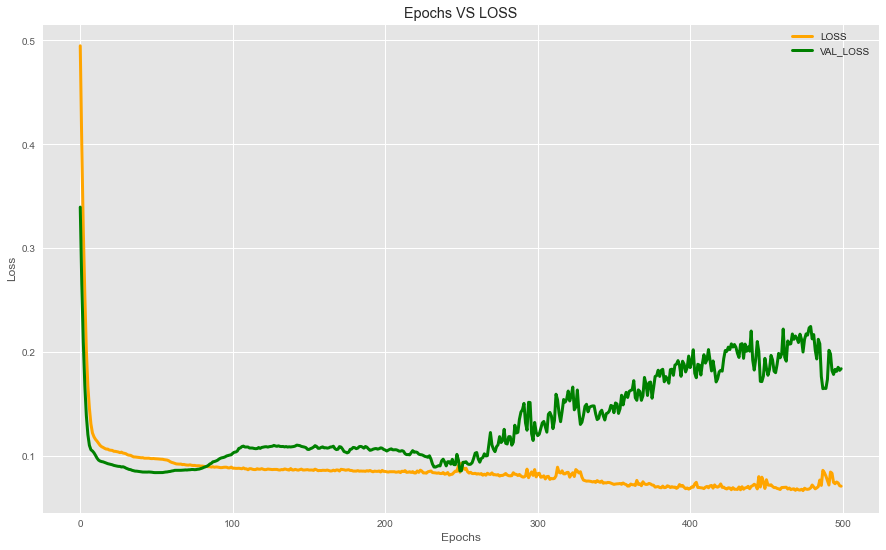

In [72]:
plt.style.use("ggplot")
plt.figure(figsize = (15, 9))
plt.plot(trainedModel.history["loss"], c = "orange", linestyle = "solid", linewidth = 3, label = "LOSS")
plt.plot(trainedModel.history["val_loss"], c = "green", linestyle = "solid", linewidth = 3, label = "VAL_LOSS")
plt.title("Epochs VS LOSS")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [73]:
# Doing forecast using Wrong Approach
trueLabels = forecast[limit : ]
predictions = []

index = limit
while len(predictions) < len(trueLabels):
    temp = RNNModel.predict(data[index].reshape(1, -1, 1))[0, 0]
    index += 1
    predictions.append(temp)

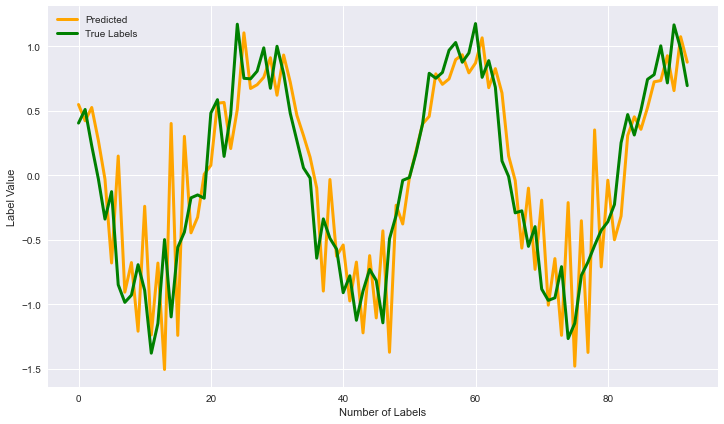

In [74]:
plt.style.use("seaborn")
plt.figure(figsize = (12, 7))
plt.plot(predictions, c = "orange", linestyle = "solid", linewidth = 3, label = "Predicted")
plt.plot(trueLabels, c = "green", linestyle = "solid", linewidth = 3, label = "True Labels")
plt.xlabel("Number of Labels")
plt.ylabel("Label Value")
plt.legend()
plt.show()

In [75]:
# Forecasting with the Correct Approach
trueLabels = forecast[limit : ]
predictions = []

last_Value_Of_Data = data[limit]
while len(predictions) < len(trueLabels):
    temp = RNNModel.predict(last_Value_Of_Data.reshape(1, -1, 1))[0, 0]
    predictions.append(temp)
    
    last_Value_Of_Data = np.roll(last_Value_Of_Data, -1)
    last_Value_Of_Data[-1] = temp

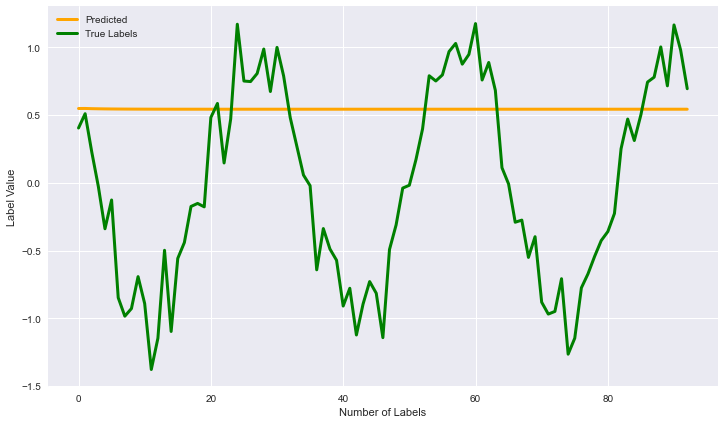

In [76]:
plt.style.use("seaborn")
plt.figure(figsize = (12, 7))
plt.plot(predictions, c = "orange", linestyle = "solid", linewidth = 3, label = "Predicted")
plt.plot(trueLabels, c = "green", linestyle = "solid", linewidth = 3, label = "True Labels")
plt.xlabel("Number of Labels")
plt.ylabel("Label Value")
plt.legend()
plt.show()

***Aforementioned are some of the variations of the RNN with synthetic sin wave data using differnet activation functions.